### Import Required Liberaries

In [1]:
# !pip install fpdf

In [2]:
import pandas as pd
import seaborn as sns
import sqlite3

from pathlib import Path

from fpdf import FPDF

import matplotlib.pyplot as  plt

In [3]:
con=sqlite3.connect('sales.db')
cur = con.cursor()

# Top Customer Sales

In [4]:
query = """

select c.first_name, c.last_name, sum(s.total_price) as total_sales
from sales s join customers c
on s.customer_id = c.customer_id
group by c.first_name, c.last_name
order by total_sales desc limit 10





"""
sales=cur.execute(query)
top_customer_sales=pd.DataFrame(sales.fetchall(),columns = ['First Name','Last Name','Total Sales'])

In [5]:
top_customer_sales['Customer Name']=top_customer_sales['First Name'] + " " + top_customer_sales['Last Name']

In [6]:
top_customer_sales

,First Name,Last Name,Total Sales,Customer Name
0,Grace,Lee,33720,Grace Lee
1,Bob,Smith,31285,Bob Smith
2,Alice,Jones,29000,Alice Jones
3,Jane,Doe,28460,Jane Doe
4,Emily,Davis,27855,Emily Davis
5,Frank,Wilson,27355,Frank Wilson
6,Isabel,Garcia,26235,Isabel Garcia
7,Henry,Chen,25920,Henry Chen
8,David,Brown,25045,David Brown
9,John,Doe,25005,John Doe


In [7]:
# sns.color_palette('Set2')
sns.husl_palette(h=.5)

[(0.20964485513246672, 0.6785281560863641, 0.6309437466865638),
 (0.22998724882099564, 0.6450347825317236, 0.8934312158972127),
 (0.8746816678040925, 0.4285053295647366, 0.9577778309603971),
 (0.9673068486894055, 0.43760373463479557, 0.5661632485543318),
 (0.7517894910942996, 0.588577607886789, 0.1945685323918893),
 (0.3729582681530643, 0.6854123694904417, 0.1925442000975004)]

### Graph

C:\Users\kushal kumar\AppData\Local\Temp\ipykernel_110724\2372232859.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,fontdict={'fontsize':12})


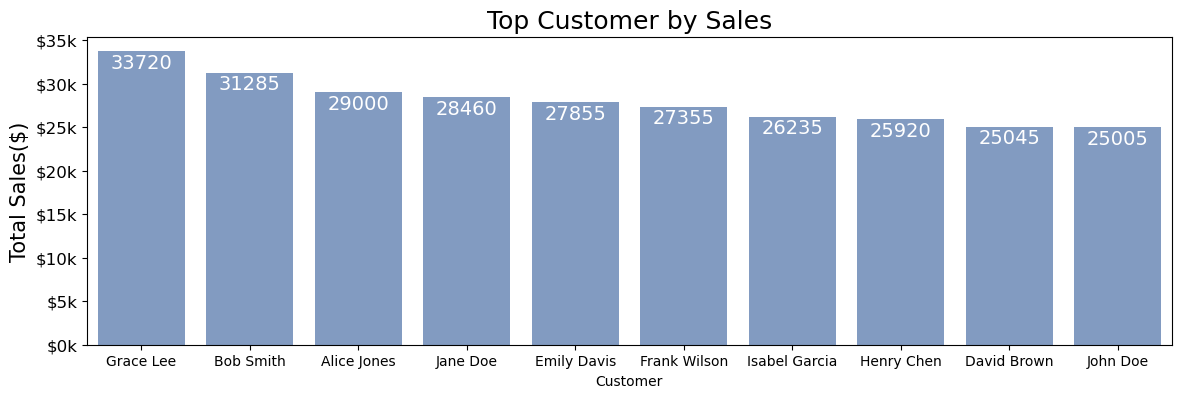

In [8]:
color = sns.dark_palette("#79C")[-1]
# color=sns.color_palette('Set2')[2]
plt.figure(figsize=(14,4))
ax=sns.barplot(x ='Customer Name',y='Total Sales', data = top_customer_sales,color=color)
plt.xlabel('Customer')

plt.ylabel('Total Sales($)',fontdict={'fontsize':15})
plt.title('Top Customer by Sales',fontdict={'fontsize':18,'fontweight':12})

ylabels = ['$' +str(int(x)) + 'k' for x in ax.get_yticks()/1000]
# plt.yticks(ylabels)
ax.set_yticklabels(ylabels,fontdict={'fontsize':12})

# Data labels
ax.bar_label(ax.containers[0],label_type='edge',padding=-15,color ='white',size =14)
plt.savefig('output/Top_Sales_by_Customer.png',dpi = 'figure')

plt.show()



## Monthly Sales

In [9]:
query = """
SELECT strftime('%Y-%m', sale_date) as Month_Name, SUM(total_price) as Total_Sales
FROM sales
GROUP BY strftime('%Y-%m', sale_date)
"""

sales=cur.execute(query)
top_customer_sales=pd.DataFrame(sales.fetchall(),columns = ['Month_Name','Total Sales'])
top_customer_sales

,Month_Name,Total Sales
0,2022-01,23600
1,2022-02,22400
2,2022-03,29660
3,2022-04,19225
4,2022-05,30015
5,2022-06,24395
6,2022-07,27525
7,2022-08,20835
8,2022-09,19285
9,2022-10,14945


In [10]:
top_customer_sales['Month_Name'] = pd.to_datetime(top_customer_sales['Month_Name'])
top_customer_sales['Month_Name']=top_customer_sales['Month_Name'].dt.month_name().str[0:3]

C:\Users\kushal kumar\AppData\Local\Temp\ipykernel_110724\2247031292.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,fontdict={'fontsize':12})


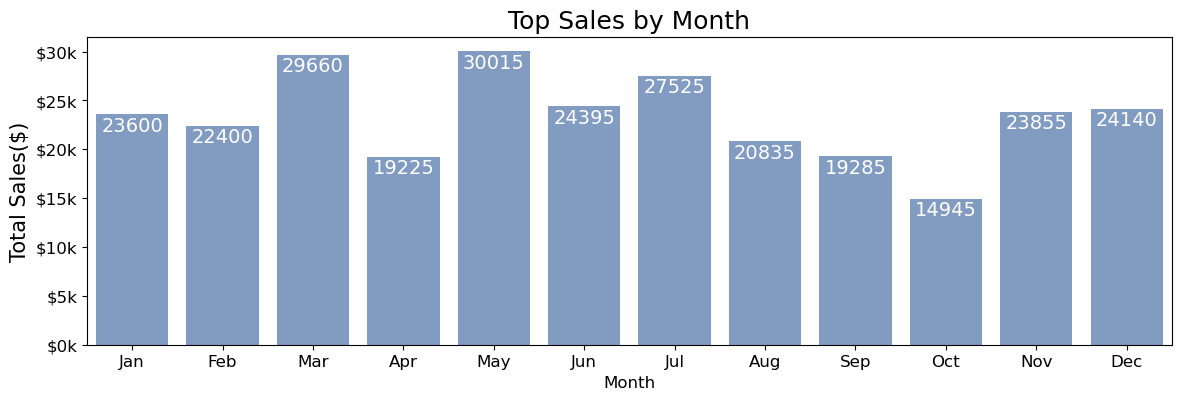

In [11]:
color = sns.dark_palette("#79C")[-1]
plt.figure(figsize=(14,4))
ax=sns.barplot(x ='Month_Name',y='Total Sales', data = top_customer_sales,color=color)
plt.xlabel('Month',fontdict={'fontsize':12})

plt.ylabel('Total Sales($)',fontdict={'fontsize':15})
plt.title('Top Sales by Month',fontdict={'fontsize':18,'fontweight':12})

ylabels = ['$' +str(int(x)) + 'k' for x in ax.get_yticks()/1000]
# plt.yticks(ylabels)
ax.set_yticklabels(ylabels,fontdict={'fontsize':12})

xlabels = [name for name in top_customer_sales['Month_Name']]

ax.set_xticklabels(xlabels,fontdict={'fontsize':12})

# Data labels
ax.bar_label(ax.containers[0],label_type='edge',padding=-15,color ='white',size =14)
plt.savefig('output/Total_Sales_by_month.png',dpi = 'figure')

plt.show()



In [12]:
top_customer_sales

,Month_Name,Total Sales
0,Jan,23600
1,Feb,22400
2,Mar,29660
3,Apr,19225
4,May,30015
5,Jun,24395
6,Jul,27525
7,Aug,20835
8,Sep,19285
9,Oct,14945


## Product Wise

In [13]:
query = """

select p.product_name, sum(s.total_price) as total_sales
from sales s join products p
on s.product_id = p.product_id
group by p.product_name






"""
sales=cur.execute(query)
top_customer_sales=pd.DataFrame(sales.fetchall(),columns = ['Product Name','Total Sales'])
top_customer_sales

,Product Name,Total Sales
0,Product A,58850
1,Product B,25350
2,Product C,84600
3,Product D,42320
4,Product E,68760


C:\Users\kushal kumar\AppData\Local\Temp\ipykernel_110724\2947383037.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,fontdict={'fontsize':12})


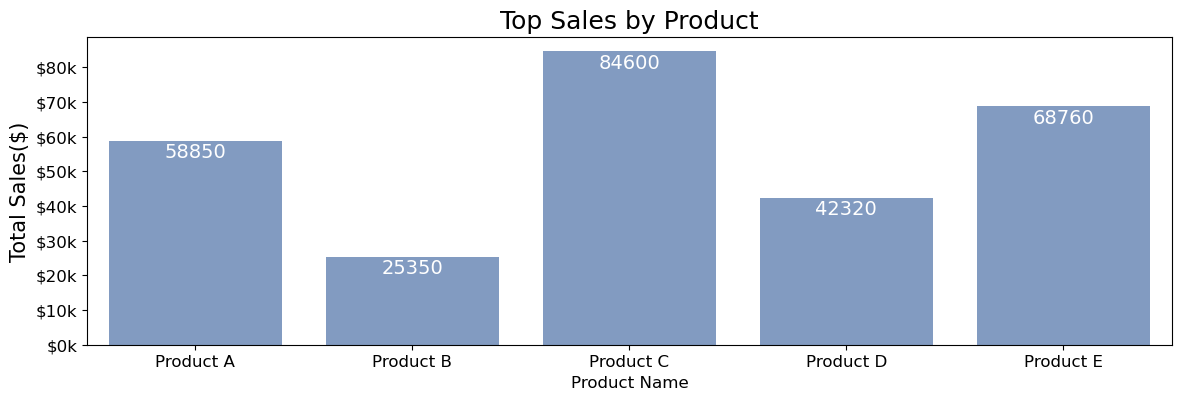

In [14]:
# color=sns.color_palette('Set2')[2]
color = sns.dark_palette("#79C")[-1]

plt.figure(figsize=(14,4))
ax=sns.barplot(x ='Product Name',y='Total Sales', data = top_customer_sales,color=color)
plt.xlabel('Product Name',fontdict={'fontsize':12})

plt.ylabel('Total Sales($)',fontdict={'fontsize':15})
plt.title('Top Sales by Product',fontdict={'fontsize':18,'fontweight':12})

ylabels = ['$' +str(int(x)) + 'k' for x in ax.get_yticks()/1000]
# plt.yticks(ylabels)
ax.set_yticklabels(ylabels,fontdict={'fontsize':12})

xlabels = [name for name in top_customer_sales['Product Name']]

ax.set_xticklabels(xlabels,fontdict={'fontsize':12})

# Data labels
ax.bar_label(ax.containers[0],label_type='edge',padding=-15,color ='white',size =14)
plt.savefig('output/Productwise_Sales.png',dpi = 'figure')

plt.show()



In [16]:
# sns.dark_palette("#79C")[-1]

# PDF Generator

In [17]:
fpdf = FPDF(orientation='P')